House Price Prediction (20 mark)
- dataset and problem: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

Requirements from the assignment:

- the best model is deployed at Heroku using GitHub actions and docker

- the service used Flask and a modeled trained in a Jupyter notebook to predict for a single sample. The end point takes a Post request with a JSON body containing the feature values.

- In the notebook, you have to do EDA and model evaluation and selection. This includes selecting the best model from Random Forest, Gradient boosting trees, polynomial regression with regularization, and k-nn. You have to do to train/validate/test split with cross-validation and hyperparameter optimization. 



You have to submit the code as one zip file to moodle. 

In [171]:
import pickle ## Save the model object to disk file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Python plotting library
import matplotlib
import seaborn as sns # More snazzy plotting library


from datetime import datetime # Typcasting date of type object ans splitting it
from sklearn.preprocessing import StandardScaler # Feature Scaling (Normalizaiton)
from sklearn.model_selection import train_test_split # Out of sample testing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from fast_ml.model_development import train_valid_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures # Train polynomial regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from pprint import pprint

In [2]:
# Read csv file and create a dataframe called df
data = pd.read_csv('./train_project_ML_house_price.csv')

### Data Exploration

In [3]:
# Show data shape (# rows, # columns)
data.shape

(1460, 81)

In [4]:
# Show first 5 rows of the data with all columns
pd.set_option('max_columns', None) 
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

##### No need for id column, doesn't indicate anything.. drop it

In [5]:
# drop datetime column
data.drop(["Id"],axis=1, inplace=True)

In [6]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [7]:
perc =[.25, .50, .75, .90]
desc = data.describe(percentiles = perc)
desc

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
90%     120.000000    96.000000   14381.700000     8.000000     7.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
90%    2006.000000   2006.000000   335.000000  1065.500000   117.200000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
90%    1232.000000  1602.200000  1680.000000   954.200000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
90%    2158.300000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
90%        4.000000      1.000000      9.000000     1.000000  2006.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274    

In [8]:
# observe null values & data types for features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
"""
pp = sns.pairplot(data=data,
                  x_vars=data['SalePrice'],
                  y_vars=data.drop(columns='SalePrice'))
pp
"""

<AxesSubplot:>

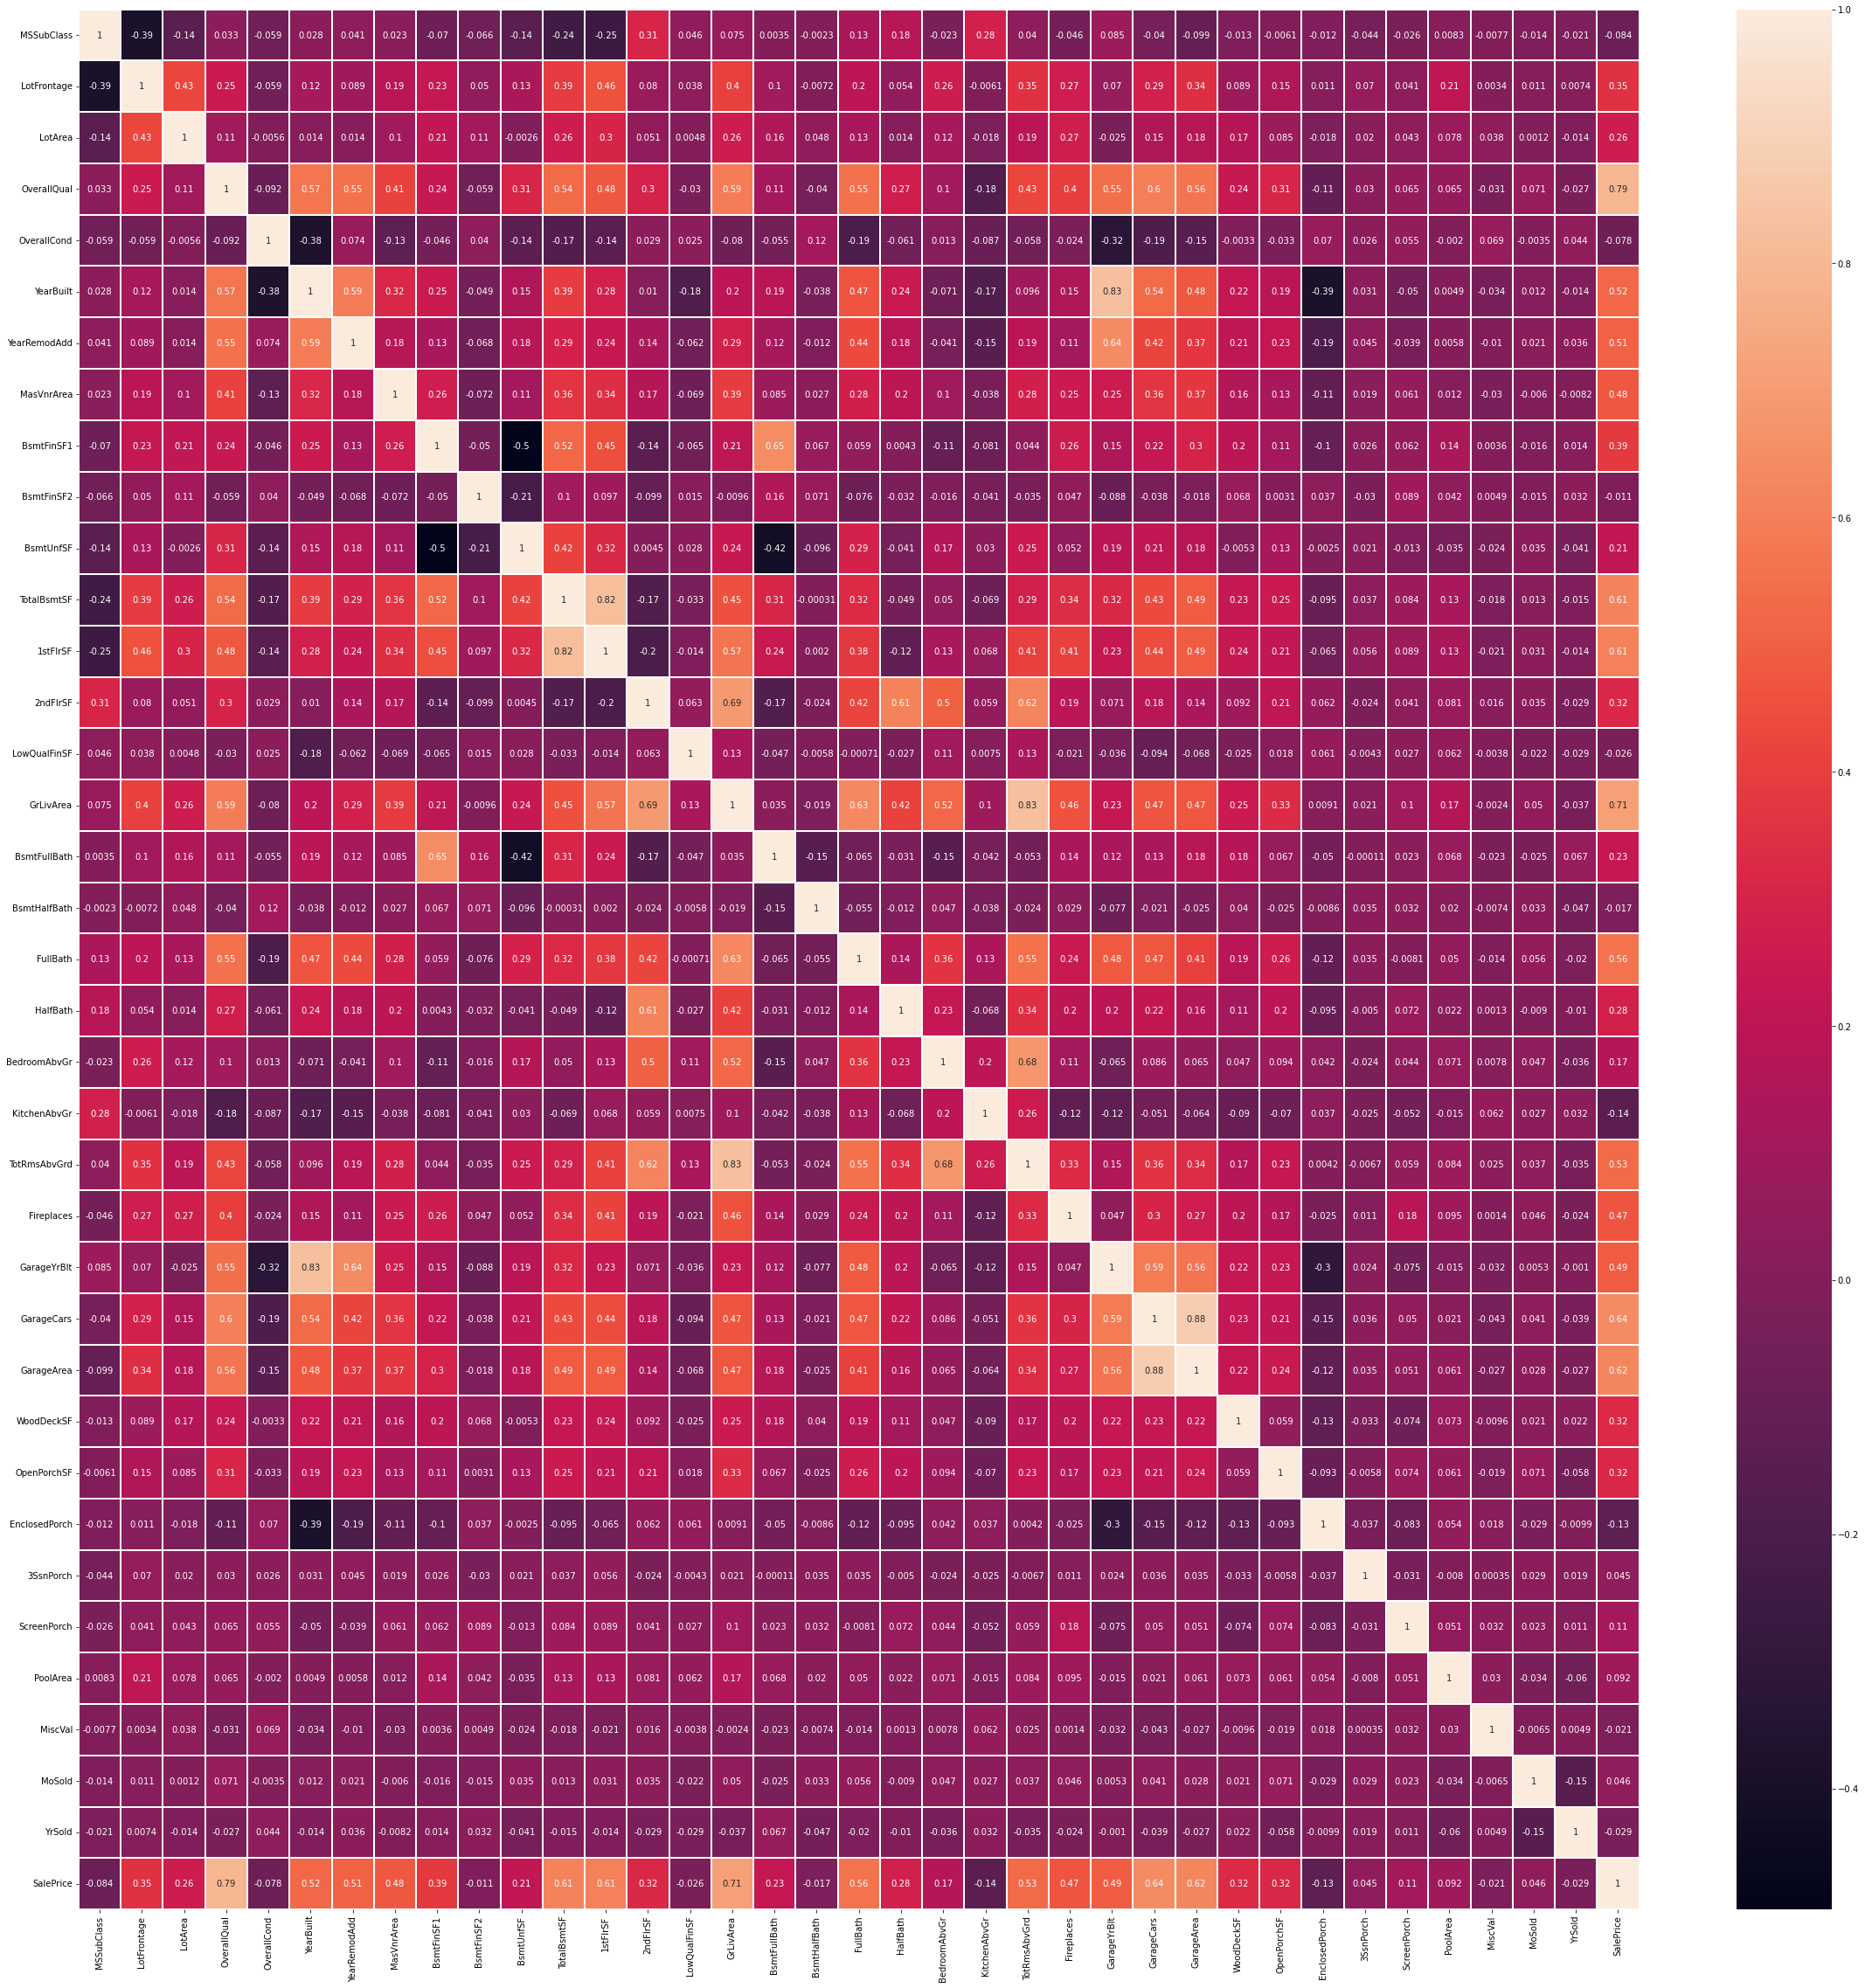

In [9]:
data_corr = data.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(data_corr, annot=True, linewidths=0.05)

In [10]:
corr_list = data_corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [ ]:
#Detect distribution and skewness for features
data.hist(bins=100) # figsize=(15,15), 

### Handle missing data

In [11]:
def get_feature_types_stats(df):
    features = df.dtypes.rename('feature_type').reset_index().rename(columns={'index':'feature'})
    return features

In [12]:
get_feature_types_stats(data)

feature feature_type
0      MSSubClass        int64
1        MSZoning       object
2     LotFrontage      float64
3         LotArea        int64
4          Street       object
..            ...          ...
75         MoSold        int64
76         YrSold        int64
77       SaleType       object
78  SaleCondition       object
79      SalePrice        int64

[80 rows x 2 columns]

In [13]:
data.isna().sum().rename('missing_count').reset_index().rename(columns={'index':'feature'}) 

feature  missing_count
0      MSSubClass              0
1        MSZoning              0
2     LotFrontage            259
3         LotArea              0
4          Street              0
..            ...            ...
75         MoSold              0
76         YrSold              0
77       SaleType              0
78  SaleCondition              0
79      SalePrice              0

[80 rows x 2 columns]

In [16]:
def get_feature_stats(df):
    missing_stats = df.isna().sum().rename('missing_count').\
    reset_index().rename(columns={'index':'feature'}) 
    
    missing_stats['missing_percentage'] = missing_stats['missing_count']/df.shape[0]
    
    feature_types_df = get_feature_types_stats(df)
    
    missing_stats = missing_stats.merge(feature_types_df,
                         on='feature',
                         how='left')
    return missing_stats

In [17]:
missing_stats = get_feature_stats(data)

In [18]:
missing_stats.sort_values('missing_percentage')

feature  missing_count  missing_percentage feature_type
0      MSSubClass              0            0.000000        int64
37    TotalBsmtSF              0            0.000000        int64
38        Heating              0            0.000000       object
78  SaleCondition              0            0.000000       object
40     CentralAir              0            0.000000       object
..            ...            ...                 ...          ...
56    FireplaceQu            690            0.472603       object
72          Fence           1179            0.807534       object
5           Alley           1369            0.937671       object
73    MiscFeature           1406            0.963014       object
71         PoolQC           1453            0.995205       object

[80 rows x 4 columns]

### Delete all features with more than 10% 

In [22]:
features_to_delete = missing_stats[
    missing_stats['missing_percentage'] > 0.1
    ]['feature'].values

features_to_delete

array(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [23]:
data.drop(columns=features_to_delete, inplace=True)

In [24]:
data.shape

(1460, 74)

In [25]:
# re compute and skip features with no missing
missing_stats = get_feature_stats(data)
missing_stats = missing_stats[missing_stats['missing_count'] != 0]
missing_stats

feature  missing_count  missing_percentage feature_type
22    MasVnrType              8            0.005479       object
23    MasVnrArea              8            0.005479      float64
27      BsmtQual             37            0.025342       object
28      BsmtCond             37            0.025342       object
29  BsmtExposure             38            0.026027       object
30  BsmtFinType1             37            0.025342       object
32  BsmtFinType2             38            0.026027       object
39    Electrical              1            0.000685       object
54    GarageType             81            0.055479       object
55   GarageYrBlt             81            0.055479      float64
56  GarageFinish             81            0.055479       object
59    GarageQual             81            0.055479       object
60    GarageCond             81            0.055479       object

In [26]:
data['GarageCond'].notna()

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: GarageCond, Length: 1460, dtype: bool

In [27]:
# delete the samples corresponding to the missing values
for one_feature in missing_stats['feature'].values:
    data = data[ data[one_feature].notna() ]

In [28]:
missing_stats = get_feature_stats(data)
missing_stats = missing_stats[missing_stats['missing_count'] != 0]
missing_stats

Empty DataFrame
Columns: [feature, missing_count, missing_percentage, feature_type]
Index: []

In [29]:
data.shape

(1338, 74)

In [46]:
types = data.dtypes
types.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [33]:
categoricals = [column for column in types.index if types.loc[column] == object]
numericals = [column for column in types.index if column not in categoricals]

In [50]:
numerical_features = data.select_dtypes(include=["float","int","bool"]).columns.values
categorical_features = data.select_dtypes(include=["object"]).columns.values
print("numerical_features: \n", numerical_features , "\n\n")
print("categorical_features: \n", categorical_features, "\n")

numerical_features: 
 ['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'SalePrice'] 


categorical_features: 
 ['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleC

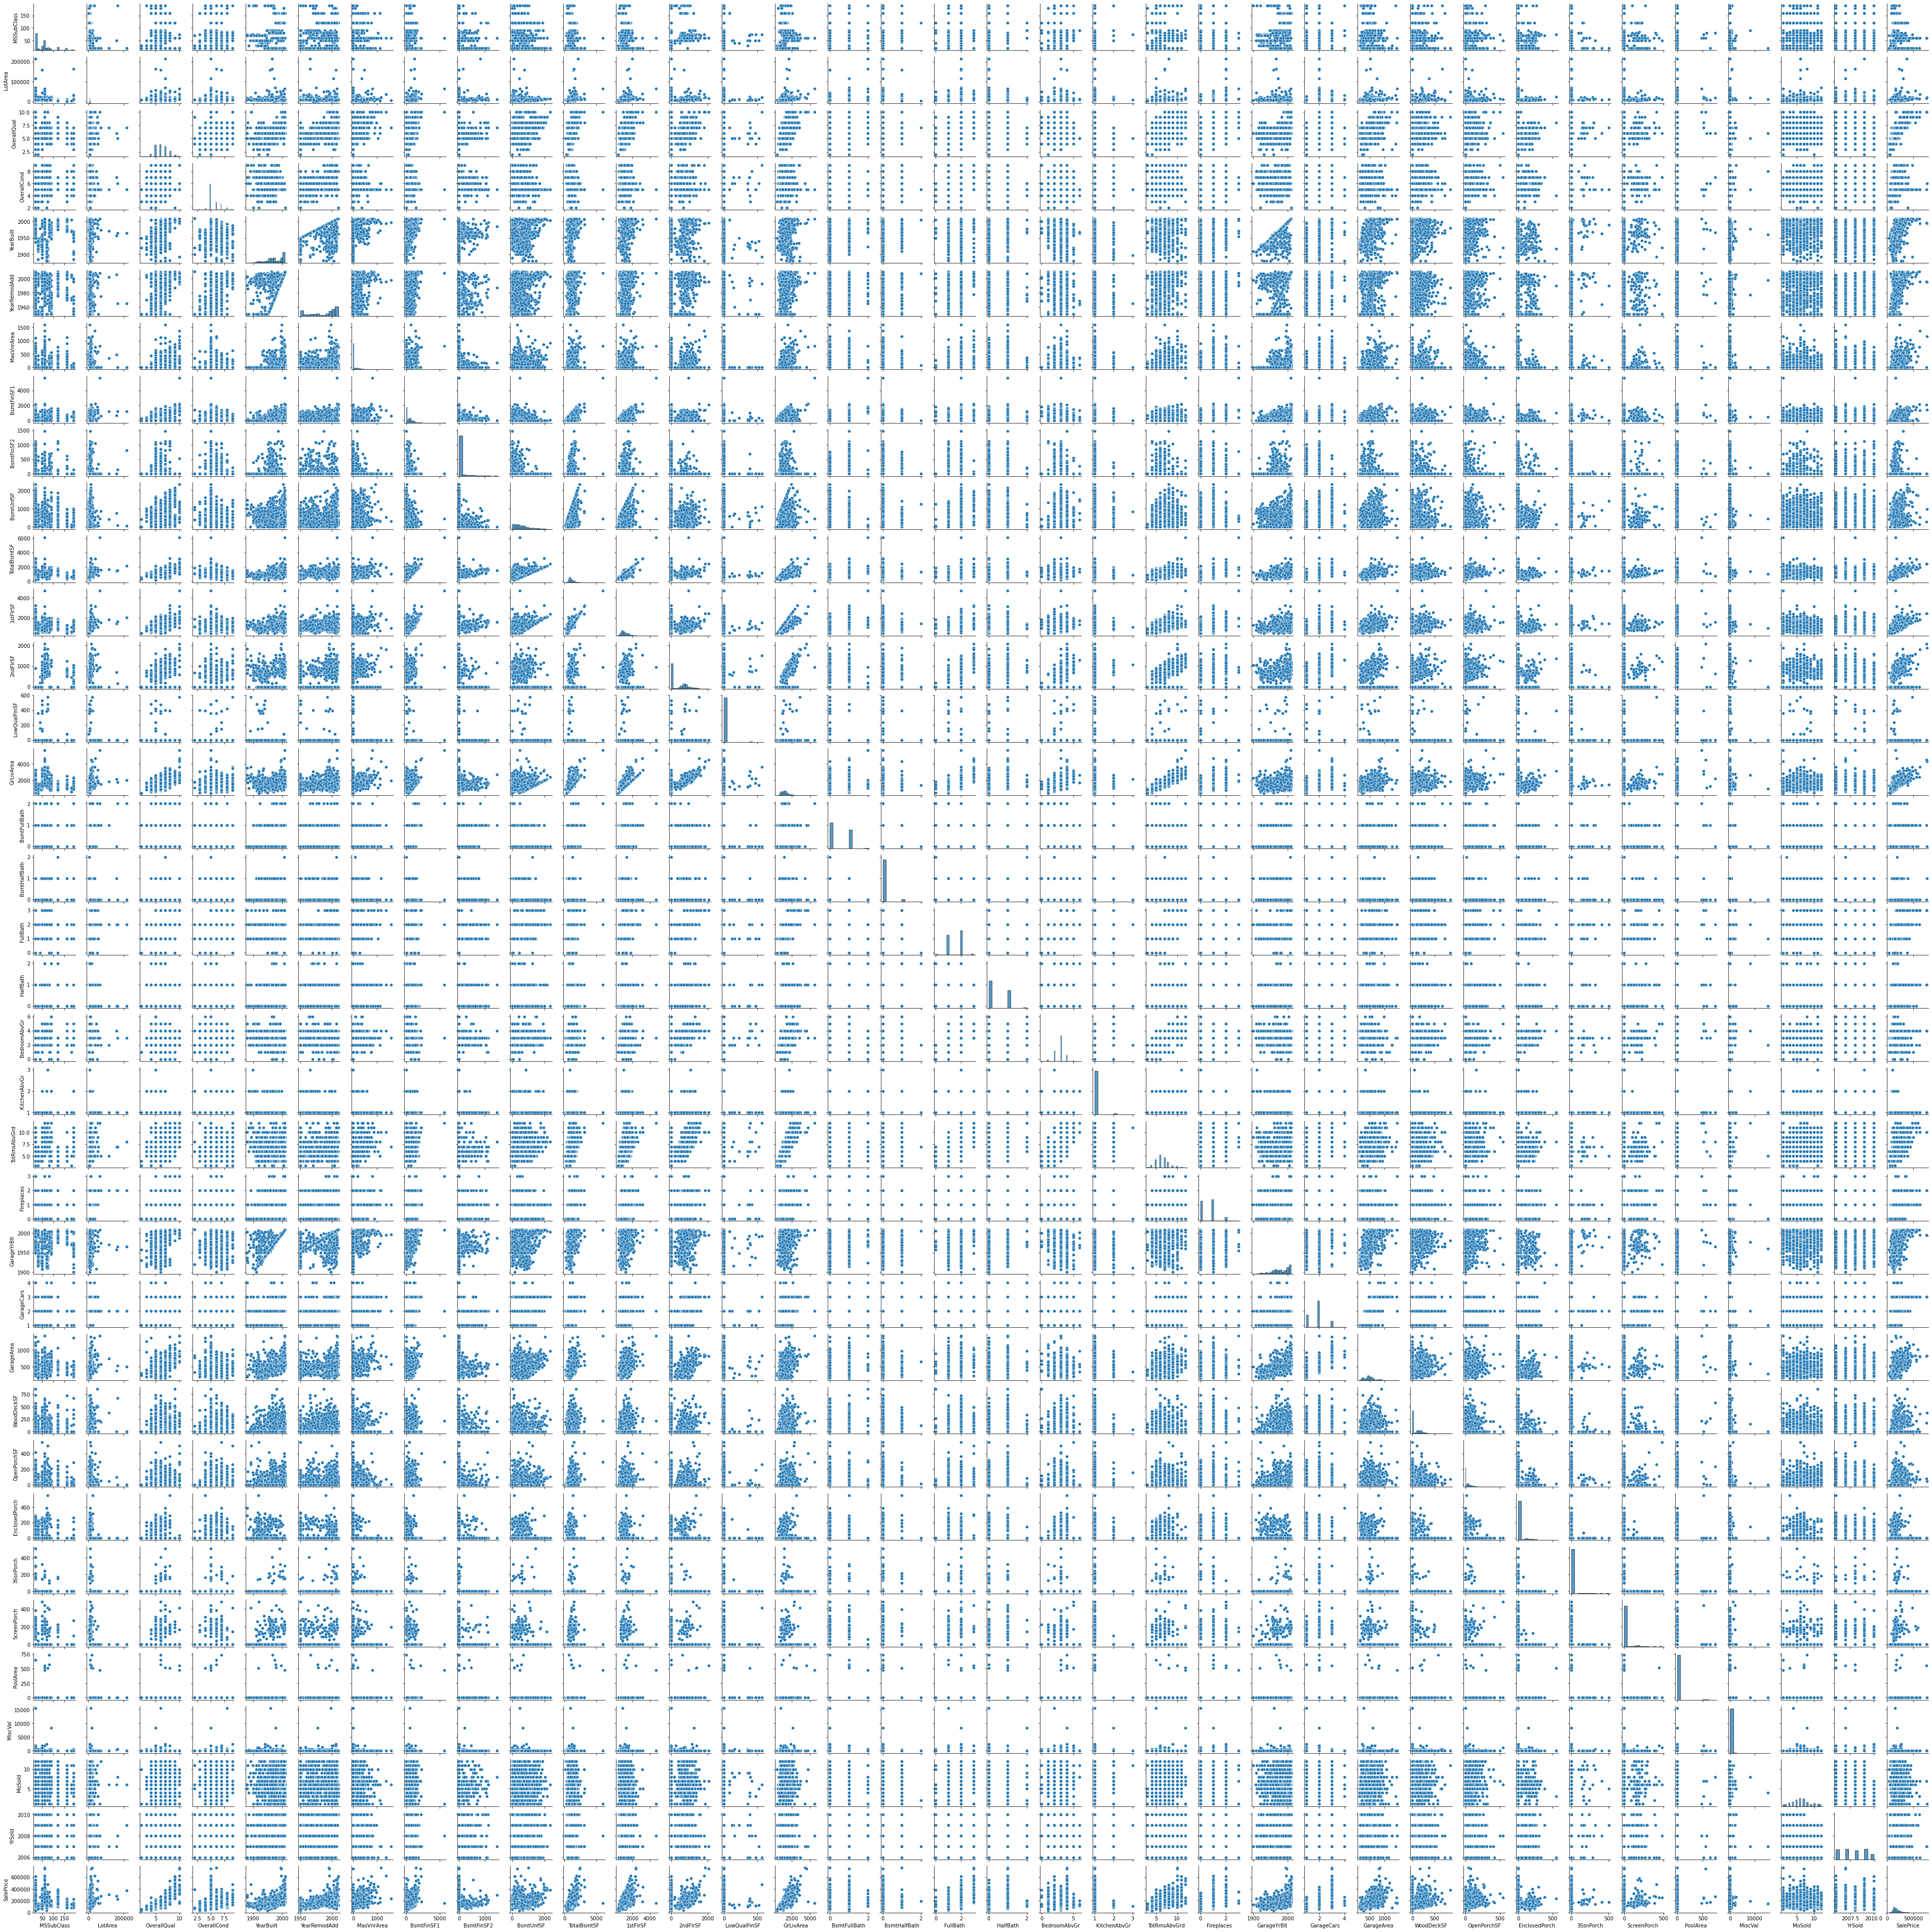

In [54]:
sns.pairplot(data, height=1.5)

## Data Preprocess

In [72]:
def preprocess_features(X):
    ''' Preprocesses the data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems(): # col: columns name    .... col_data: samples for each col in each iteration

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col) # e.g. 'Stree' => 'street_pave', 'street_grvl'
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

In [79]:
data = preprocess_features(data)
print(f"Processed feature columns ({data.shape[1]})") # \ntotal features:\n{list(X_all.columns)}

Processed feature columns (265)


In [80]:
data_categ_encoded.head()

MSSubClass  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0          60                 0            0            0            1   
1          20                 0            0            0            1   
2          60                 0            0            0            1   
3          70                 0            0            0            1   
4          60                 0            0            0            1   

   MSZoning_RM  LotArea  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  \
0            0     8450            0            1             0             0   
1            0     9600            0            1             0             0   
2            0    11250            0            1             1             0   
3            0     9550            0            1             1             0   
4            0    14260            0            1             1             0   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Low  LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  \
0                0                1                 1                 0   
1                0                1                 1                 0   
2                0                1                 1                 0   
3                0                1                 1                 0   
4                0                1                 1                 0   

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 1                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
0                 1              1              0              0   
1                 0              1              0              0   
2                 1              1              0              0   
3                 0              1              0              0   
4                 0              1              0              0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0        

In [81]:
data.dtypes

MSSubClass               int64
MSZoning_C (all)         uint8
MSZoning_FV              uint8
MSZoning_RH              uint8
MSZoning_RL              uint8
                         ...  
SaleCondition_Alloca     uint8
SaleCondition_Family     uint8
SaleCondition_Normal     uint8
SaleCondition_Partial    uint8
SalePrice                int64
Length: 265, dtype: object

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning_C (all)'}>,
        <AxesSubplot:title={'center':'MSZoning_FV'}>,
        <AxesSubplot:title={'center':'MSZoning_RH'}>,
        <AxesSubplot:title={'center':'MSZoning_RL'}>,
        <AxesSubplot:title={'center':'MSZoning_RM'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street_Grvl'}>,
        <AxesSubplot:title={'center':'Street_Pave'}>,
        <AxesSubplot:title={'center':'LotShape_IR1'}>,
        <AxesSubplot:title={'center':'LotShape_IR2'}>,
        <AxesSubplot:title={'center':'LotShape_IR3'}>,
        <AxesSubplot:title={'center':'LotShape_Reg'}>,
        <AxesSubplot:title={'center':'LandContour_Bnk'}>,
        <AxesSubplot:title={'center':'LandContour_HLS'}>,
        <AxesSubplot:title={'center':'LandContour_Low'}>],
       [<AxesSubplot:title={'center':'LandContour_Lvl'}>,
        <AxesSubplot:title={'center':'Utilities_AllPub'}>,
  

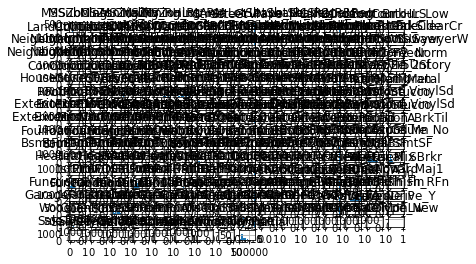

In [94]:
data.hist(bins=100)

### Split to train, validate, test set

In [97]:
X_train, y_train, X_valid, y_valid, X_test, y_test = \
        train_valid_test_split(data, target = 'SalePrice', 
                               train_size=0.6, valid_size=0.2, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(802, 264) (802,)
(268, 264) (268,)
(268, 264) (268,)


In [93]:
np.array(y_train).reshape(1, y_train.shape[0]).shape
np.array(y_valid).reshape(1, y_valid.shape[0]).shape
np.array(y_test).reshape(1, y_test.shape[0]).shape

(1, 802)

### data normalization 

In [ ]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [103]:
X = data.drop(['SalePrice'],axis=1)
y = data[['SalePrice']]

In [104]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 207650.907844
Best score using built-in LassoCV: 0.709267


In [105]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 254 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

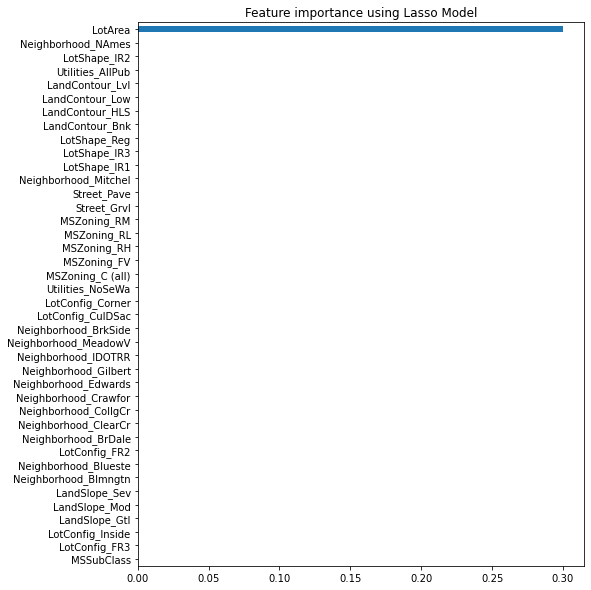

In [119]:
imp_coef = coef[:40].sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [123]:
lasso = Lasso()
print(cross_val_score(lasso, X, y, cv=3))

[0.8963901  0.81947863 0.7330293 ]


In [126]:
cv_results = cross_validate(lasso, X, y, cv=3)
sorted(cv_results.keys())

cv_results['test_score']

array([0.8963901 , 0.81947863, 0.7330293 ])

In [127]:
scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])

[-6.24547478e+08 -1.22655244e+09 -1.55618675e+09]
[0.92664539 0.94630107 0.93465608]


In [129]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

val_errors = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
    errors = np.sum(-cross_val_score(lasso, 
                                     data, 
                                     y=y, 
                                     scoring='neg_mean_squared_error', 
                                     cv=10, 
                                     n_jobs=-1))
    val_errors.append(np.sqrt(errors))

In [130]:
print(val_errors)


[0.00020768833977716027, 0.002348940600668143, 0.01773443609863675, 0.026218430870800936, 0.18844566095271043, 0.030900260973255034]


In [131]:
print('best alpha: {}'.format(alphas[np.argmin(val_errors)]))

best alpha: 0.0001


#### Residual Plot 

In [ ]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

best way to detect accuracy visualy ==> using scatter plot for 2D ==> x-axis: actual data  ,  y-axis: predicted

## Polynomial

In [98]:
poly_features = PolynomialFeatures(degree=2, interaction_only=False) # include_bias=False

# Transform the existing features to 2nd degree
X_poly_train = poly_features.fit_transform(X_train)

# Show the transformation
X_poly_train

array([[  1., 160.,   0., ...,   1.,   0.,   0.],
       [  1.,  80.,   0., ...,   1.,   0.,   0.],
       [  1.,  20.,   0., ...,   1.,   0.,   0.],
       ...,
       [  1.,  50.,   0., ...,   1.,   0.,   0.],
       [  1.,  60.,   0., ...,   1.,   0.,   0.],
       [  1.,  30.,   0., ...,   1.,   0.,   0.]])

## KNN

In [158]:
# Grid search 
k_range = range(1, 51)
param_grid = {'n_neighbors': k_range}
gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5) #, verbose=3)
gs.fit(X_train, y_train)
print(f"Score on validation set: {gs.score(X_valid, y_valid)}")
print(f"Best parameters: {gs.best_params_}")
print(f'Best CV Score: {gs.best_score_}')

Score on validation set: 0.014925373134328358
Best parameters: {'n_neighbors': 5}
Best CV Score: 0.009968944099378882


## Gradient Boosting Tree

In [166]:
def model_gradient_boosting_tree(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    gbr = GradientBoostingRegressor(random_state=0)
    param_grid = {
        'n_estimators': [500],
        'max_features': [10,15],
        'max_depth': [6,8,10],
        'learning_rate': [0.05,0.1,0.15],
        'subsample': [0.8]
    }
    model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=10) #, scoring=RMSE)
    model.fit(X_train, y_train)
    print('Gradient boosted tree regression...')
    print(f'Best Params: {model.best_params_}')
    print(f'Best CV Score: {model.best_score_}')

    y_pred = model.predict(Xtest)
    return y_pred, model.best_score_ # -model.best_score_

In [167]:
model_gradient_boosting_tree(X_train,X_valid,y_train)

Gradient boosted tree regression...
Best Params: {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 10, 'n_estimators': 500, 'subsample': 0.8}
Best CV Score: -0.8572291417987359


(array([284553.34268771, 132593.91674242, 119205.58567592, 173489.17987535,
        210198.91079594, 127146.57779978, 143648.73017663, 133248.4167127 ,
        210231.18321987, 394270.01452798, 272364.06447057, 136596.48661699,
        281100.86745827, 186651.9659746 , 111886.27014162, 377571.36001449,
        194422.55488236, 173037.03551702, 264947.91558177, 165311.00978788,
        116526.10025927, 129519.23014083, 230177.720523  , 148314.09969313,
        350126.13927919, 130006.9453649 , 172210.04207694, 252029.80013783,
        184944.63779243, 184057.52972592, 120806.64075857, 223290.13397819,
        219791.06392136, 194315.40260515, 246270.64763484, 149157.99333898,
        146631.51680567, 159456.56491261, 146600.67671954, 173521.61886162,
        116726.10350593, 129230.48682344, 159458.87652987, 337648.61299447,
        201121.88056313, 338104.95017413, 165819.86193258, 153570.53984793,
        140727.16707779, 141520.51580817, 133226.63420266, 221132.03557881,
        2540

## Random Forest

In [176]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [168]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

In [ ]:
print(f'Improvement of {( 100 * (grid_accuracy - base_accuracy) / base_accuracy)}')

## Model selection

In [ ]:
X = iris.data
y = iris.target
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20) # param: best_param from hyperparameter tuning ?


print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

function جاهز >> .best_model

In [ ]:
مثلا ببالي انه اخزن best_params او best_estimaters لكل algorithm بمتغير dictionary , وامرره كباراميتر للalgorithm بال model evaluation

In [138]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.006727639995511165


In [140]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.009707103579845135


We can conclude that KNN(the highest score) is likely a better choice than logistic regression